Youtube Comments Summarizer  Pipeline:

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from haystack import Pipeline, component
from haystack import component
from haystack.components.builders import PromptBuilder

from src.custom_components.components import ReviewData

import pandas as pd

In [12]:
CSV_PATH = "comments-2024-09-07 22:44:00.473900.csv" # TODO: Change this to the csv file generated by the youtube_comments_scraper.py

In [13]:
review_data = ReviewData()

output = review_data.run(csv_file_path=CSV_PATH)
output["reviews"]

[{'author': '@FleetingFilms',
  'comment': 'Oh wow she captures that feeling of missing someone so much that it would almost feel better if they never existed '},
 {'author': '@IkerUnzu',
  'comment': 'Her acting is incredible in this video omg'},
 {'author': '@schmoyoho',
  'comment': 'gonna erase my memory so i can hear this for the first time again'},
 {'author': '@pabloo_.',
  'comment': 'i don’t care of any other opinion, eternal sunshine IS the album of the year.'},
 {'author': '@crazeerathana',
  'comment': 'GIVE EVAN PETERS HIS ROMCOM  let this man be happy and fall in love. Let him breathe. Thank you Ari for fulfilling something he’s been wanting to do'},
 {'author': '@chicken',
  'comment': 'one of her best music videos. so beautiful'},
 {'author': '@mplacencia28',
  'comment': "I love to see Evan smile, he plays so many dark characters (flawlessly, I may add) that it's so relieving to see him play something so light. We need more playful/smiley Evan pleeeease."},
 {'author':

In [14]:
from haystack_integrations.components.generators.amazon_bedrock import AmazonBedrockGenerator

generator = AmazonBedrockGenerator(
        model="amazon.titan-text-lite-v1",
        max_length=99
)

In [15]:
review_data = ReviewData()

template = """You will be provided a few of the top comments for a youtube video. Based on the comments, Summarize people's opinions of the new song.
Comments:  
{% for review in reviews %}
  Comment:\n
  {{ review['author'] }} wrote {{ review['comment'] }}
{% endfor %}  
"""
prompt1 = PromptBuilder(template=template)
print(prompt1.run(template_variables={"reviews": review_data.run(csv_file_path=CSV_PATH)["reviews"] }))


{'prompt': "You will be provided a few of the top comments for a youtube video. Based on the comments, Summarize people's opinions of the new song.\nComments:  \n\n  Comment:\n\n  @FleetingFilms wrote Oh wow she captures that feeling of missing someone so much that it would almost feel better if they never existed \n\n  Comment:\n\n  @IkerUnzu wrote Her acting is incredible in this video omg\n\n  Comment:\n\n  @schmoyoho wrote gonna erase my memory so i can hear this for the first time again\n\n  Comment:\n\n  @pabloo_. wrote i don’t care of any other opinion, eternal sunshine IS the album of the year.\n\n  Comment:\n\n  @crazeerathana wrote GIVE EVAN PETERS HIS ROMCOM  let this man be happy and fall in love. Let him breathe. Thank you Ari for fulfilling something he’s been wanting to do\n\n  Comment:\n\n  @chicken wrote one of her best music videos. so beautiful\n\n  Comment:\n\n  @mplacencia28 wrote I love to see Evan smile, he plays so many dark characters (flawlessly, I may add) th

In [16]:
review_data = ReviewData()

template = """You will be provided a few of the top comments for a youtube video. Based on the comments, Summarize people's opinions of the new song?
Comments:  
{% for review in reviews %}
  Comment:\n
  {{ review['author'] }} wrote {{ review['comment'] }}
{% endfor %}  
"""
prompt1 = PromptBuilder(template=template)

dialogue_builder1 = Pipeline()
dialogue_builder1.add_component("review_data", review_data)
dialogue_builder1.add_component("prompt", prompt1)
dialogue_builder1.add_component("llm", generator)

dialogue_builder1.connect("review_data.reviews", "prompt.reviews")
dialogue_builder1.connect("prompt", "llm")

🚅 Components
  - review_data: ReviewData
  - prompt: PromptBuilder
  - llm: AmazonBedrockGenerator
🛤️ Connections
  - review_data.reviews -> prompt.reviews (str)
  - prompt.prompt -> llm.prompt (str)

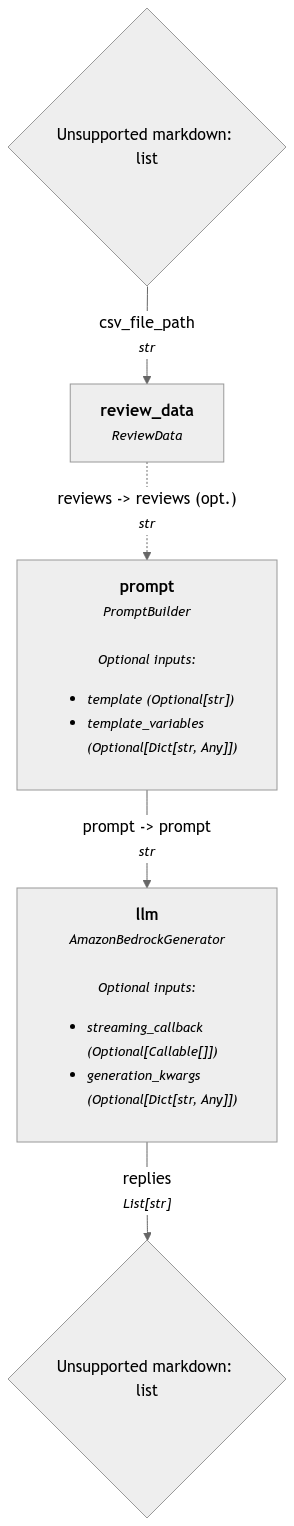

In [17]:
dialogue_builder1.show()

In [18]:
dialogue1 = dialogue_builder1.run({"review_data": {"csv_file_path":CSV_PATH}})

print(dialogue1["llm"])

{'replies': ["Based on the provided content, here is a summary of people's opinions of the new song:\n\n  The song is beautiful and captures the feeling of missing someone so much that it would almost feel better if they never existed."]}


In [19]:

print(dialogue_builder1.dumps())

components:
  llm:
    init_parameters:
      aws_access_key_id:
        env_vars:
        - AWS_ACCESS_KEY_ID
        strict: false
        type: env_var
      aws_profile_name:
        env_vars:
        - AWS_PROFILE
        strict: false
        type: env_var
      aws_region_name:
        env_vars:
        - AWS_DEFAULT_REGION
        strict: false
        type: env_var
      aws_secret_access_key:
        env_vars:
        - AWS_SECRET_ACCESS_KEY
        strict: false
        type: env_var
      aws_session_token:
        env_vars:
        - AWS_SESSION_TOKEN
        strict: false
        type: env_var
      max_length: 99
      model: amazon.titan-text-lite-v1
      streaming_callback: null
      truncate: true
    type: haystack_integrations.components.generators.amazon_bedrock.generator.AmazonBedrockGenerator
  prompt:
    init_parameters:
      required_variables: null
      template: "You will be provided a few of the top comments for a youtube video.\
        \ Based on the 

In [ ]:
with open("./haystack_pipeline.yaml", "w") as file:
  dialogue_builder1.dump(file)